In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
import random

import mplhep as hep

hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
import design_parameters as dp

In [3]:
#create a pickle file with the layouts of all of the layers
import pickle
with open("all_layers.pkl",'rb') as f:
    all_layers=pickle.load(f)
with open("summary.pkl", 'rb') as f:
    summary=pickle.load(f)

In [4]:
sl=list(set(dp.sidelengths))
print(sl)

[1.889, 3.589, 4.486]


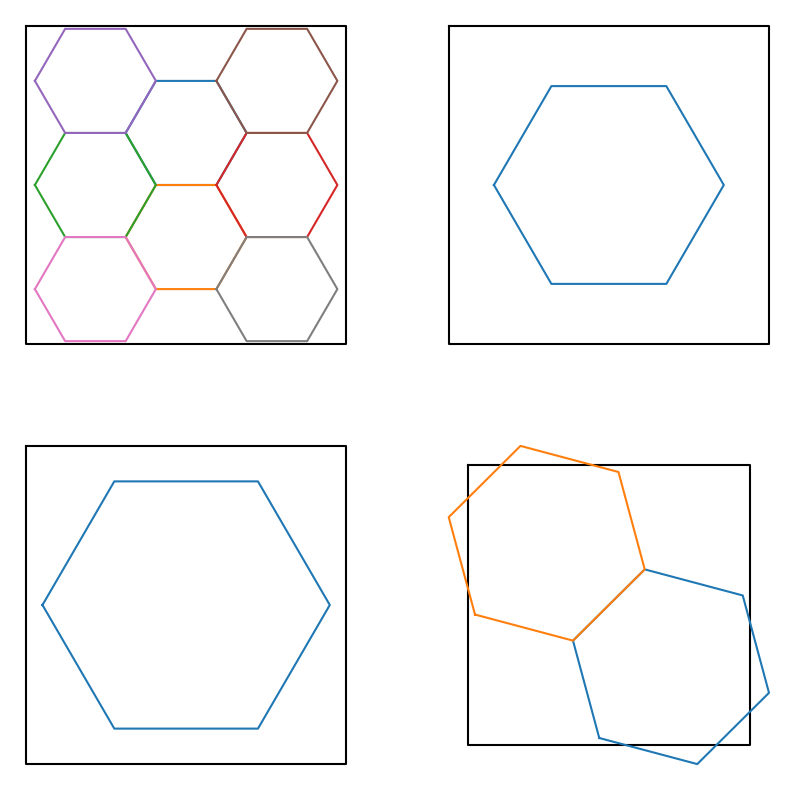

In [5]:
fig, axs=plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    plt.sca(axs[i//2][i%2])
    #if i !=3:
    plt.plot([-5,5,5, -5, -5], [5,5,-5, -5, 5], color='k')
    
    if i == 0:
        ph =np.linspace(-np.pi, np.pi, 7)
        for c,r in (0,1),(0, -1),(-1, 0), (1, 0), (-1, 2), (1, 2), (-1, -2), (1, -2):
            plt.plot(3/2*sl[i]*c+sl[i]*np.cos(ph), sl[i]*r*np.sqrt(3)/2+sl[i]*np.sin(ph))
    if i == 3:
        
        ph =np.linspace(-np.pi, np.pi, 7)
        ph+=np.pi/4
        for c,r in (0,1),(0, -1):
            x0, y0=3/2*sl[1]*c,sl[1]*r*np.sqrt(3)/2
            x=(x0+y0)/np.sqrt(2)
            y=(x0-y0)/np.sqrt(2)
            plt.plot(x+sl[1]*np.cos(ph), y+sl[1]*np.sin(ph))
#     if i == 1:
#         ph =np.linspace(-np.pi, np.pi, 7)
        
#         for c,r in (0.5/3,1),(-0.5/3, -1):
#             x0, y0=3/2*sl[i]*c,sl[i]*r*np.sqrt(3)/2
            
#             plt.plot(x0+sl[i]*np.cos(ph), y0+sl[i]*np.sin(ph))
    if i == 1 or i ==2:
        ph =np.linspace(-np.pi, np.pi, 7)
        for c,r in (0,0),:
            x0, y0=3/2*sl[i]*c,sl[i]*r*np.sqrt(3)/2
            
            plt.plot(x0+sl[i]*np.cos(ph), y0+sl[i]*np.sin(ph))
    plt.gca().axis('off')

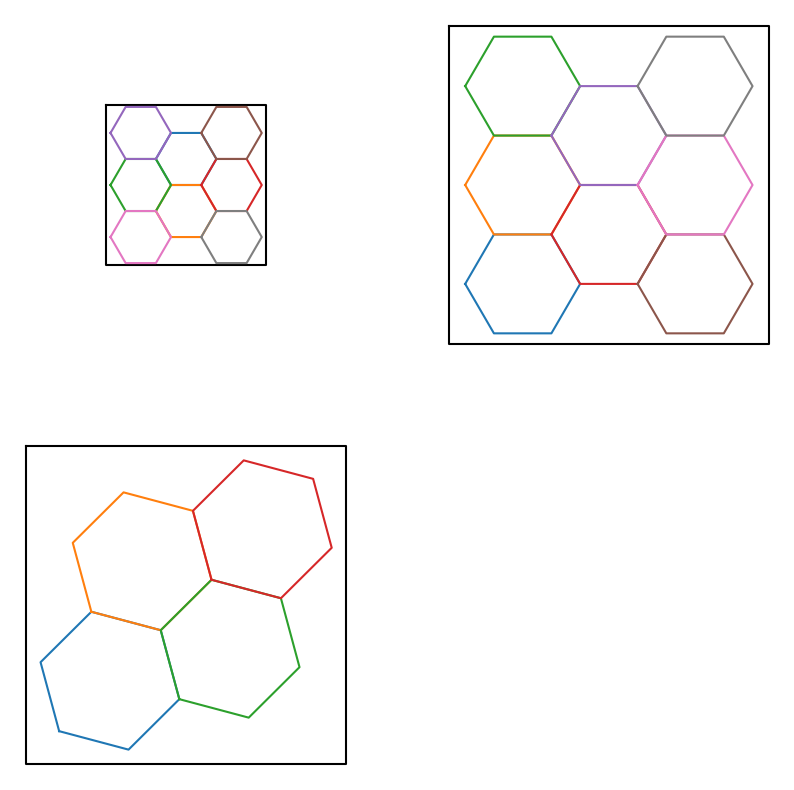

In [6]:

fig, axs=plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    plt.sca(axs[i//2][i%2])
    plt.xlim(-11, 11)
    plt.ylim(-11, 11)
    
    if i == 0:
        plt.plot([-5,5,5, -5, -5], [5,5,-5, -5, 5], color='k')
        ph =np.linspace(-np.pi, np.pi, 7)
        for c,r in (0,1),(0, -1),(-1, 0), (1, 0), (-1, 2), (1, 2), (-1, -2), (1, -2):
            plt.plot(3/2*sl[i]*c+sl[i]*np.cos(ph), sl[i]*r*np.sqrt(3)/2+sl[i]*np.sin(ph))
    
    
    
#     if i == 0:
#         ph =np.linspace(-np.pi, np.pi, 7)
#         for c in range(-3, 3):
#             for r in range(-5,5):
#                 if (c+r)%2==1:
#                     continue
#                 plt.plot((3/2*c+1)*sl[i]+sl[i]*np.cos(ph), sl[i]*(r+.5)*np.sqrt(3)/2+sl[i]*np.sin(ph))
    if i == 1:
        plt.plot([-10,10,10, -10, -10], [10,10,-10, -10, 10], color='k')
        ph =np.linspace(-np.pi, np.pi, 7)
        for c in range(-1, 2):
            for r in range(-2,3):
                if (c+r)%2==0:
                    continue
                plt.plot((3/2*c)*sl[i]+sl[i]*np.cos(ph), sl[i]*r*np.sqrt(3)/2+sl[i]*np.sin(ph))
    
    if i ==2:
        plt.plot([-10,10,10, -10, -10], [10,10,-10, -10, 10], color='k')
        ph =np.linspace(-np.pi, np.pi, 7)
        ph+=np.pi/4
        for c in range(-1, 2):
            for r in range(-1,2):
                if (c+r)%2==0:
                    continue
                x0, y0=3/2*sl[i]*c,sl[i]*r*np.sqrt(3)/2
                x=(x0+y0)/np.sqrt(2)
                y=(x0-y0)/np.sqrt(2)
                plt.plot(x+sl[i]*np.cos(ph), y+sl[i]*np.sin(ph))
    plt.gca().axis('off')

In [31]:
ntot_squares={10:0, 20:0}
tot_area=0
for i,sidelength in enumerate(sl):
    #sub dataframe for this layer.  2 entries (top, bottom)
    df=summary.query(f"sidelength=={sidelength}")
    n_per_square=[8, 8, 4][i]
    
    ssl=[10,20,20][i]
    n_squares=int(np.ceil(sum(df.channels)/n_per_square))
    ntot_squares[ssl]+=n_squares
    word="small medium large".split()[i]
    print(f"number of {word} hexagons: {sum(df.channels)}")
    print(f"number of {ssl}x{ssl} cm^2 squares cut into {n_per_square} {word} hexagons each: {n_squares}")
    tot_area+=n_squares*ssl**2
print()
for ssl in [10,20]:
    print(f"number of {ssl}x{ssl} cm^2 squares total: {ntot_squares[ssl]}")
print(f"total amount of scintillator material needed {tot_area} cm^2")

number of small hexagons: 2463
number of 10x10 cm^2 squares cut into 8 small hexagons each: 308
number of medium hexagons: 912
number of 20x20 cm^2 squares cut into 8 medium hexagons each: 114
number of large hexagons: 3116
number of 20x20 cm^2 squares cut into 4 large hexagons each: 779

number of 10x10 cm^2 squares total: 308
number of 20x20 cm^2 squares total: 893
total amount of scintillator material needed 388000 cm^2


In [8]:
print((20-6*np.sqrt(3)*sl[0])/5)

0.07378722940286905


In [9]:
print("layer,pcb area (cm2),scint area (cm2),SiPMs")
for layer in range(dp.n_layers):
    #sub dataframe for this layer.  2 entries (top, bottom)
    df=summary.query(f"layer=={layer}")
    #n_per_square==8 if df.sidelength<2 else 1
    print(f"{layer},{sum(df.tot_area):.1f},{sum(df.scint_area):.1f},{sum(df.channels)}")

df=summary
print(f"total,{sum(df.tot_area):.1f},{sum(df.scint_area):.1f},{sum(df.channels)}")

layer,pcb area (cm2),scint area (cm2),SiPMs
0,3085.4,2824.5,345
1,3080.6,2837.3,368
2,3075.7,2824.9,349
3,3070.9,2816.4,345
4,3066.0,2828.9,368
5,3061.1,2797.1,343
6,3056.2,2806.6,345
7,3051.3,2826.0,103
8,3046.3,2768.2,99
9,3041.4,2861.9,102
10,3036.4,2815.6,103
11,3031.4,2759.2,99
12,3026.3,2853.5,102
13,3021.3,2804.7,103
14,3016.2,2749.7,99
15,3011.2,2844.6,102
16,3006.1,2828.8,75
17,3000.9,2763.9,64
18,2995.8,2811.2,65
19,2990.6,2819.7,75
20,2985.5,2750.6,64
21,2980.3,2797.4,65
22,2975.1,2779.1,73
23,2969.8,2735.9,64
24,2964.6,2782.8,65
25,2959.3,2772.1,73
26,2954.0,2689.2,62
27,2948.7,2768.0,65
28,2943.4,2763.7,73
29,2938.0,2647.0,60
30,2932.7,2753.0,65
31,2927.3,2754.0,73
32,2921.9,2637.9,60
33,2916.5,2707.1,63
34,2911.0,2743.5,73
35,2905.6,2628.3,60
36,2900.1,2695.5,63
37,2894.6,2732.2,73
38,2889.1,2618.1,60
39,2883.5,2683.7,63
40,2878.0,2687.3,71
41,2872.4,2607.4,60
42,2866.8,2655.4,62
43,2861.2,2676.9,71
44,2855.6,2596.2,60
45,2849.9,2612.9,60
46,2844.3,2665.8,71
47,2838.6,258

In [28]:
#half-hexagons on the top/bottom of the detector
n_large_hex_half=0
for (lay,side),df in all_layers.items():
    if lay>=18:
        df=df.query(f"row== {max(df.row)} or row=={min(df.row)}")
        n_large_hex_half+=len(df)
n_med_hex_half=0
for (lay,side),df in all_layers.items():
    if lay>=9 and lay <18:
        df=df.query(f"row== {max(df.row)} or row=={min(df.row)}")
        n_med_hex_half+=len(df)
        
        
n_large_hex_full=sum(summary.query(f"sidelength=={sl[2]}").channels)-n_large_hex_half
n_med_hex_full=sum(summary.query(f"sidelength=={sl[1]}").channels)-n_med_hex_half
n_small_hex=sum(summary.query(f"sidelength=={sl[0]}").channels)

nA=0 # 4 L 10 S 
nB=100 # 8 M 2 Mh
nC=0 # 33 S
nD=665 # 4 L 2 Lh 4 S

print(nA*4+nD*4,n_large_hex_full)
print(nB*8,n_med_hex_full)
print(nB*2,n_med_hex_half)
print(nA*8+nC*33+nD*4, n_small_hex)
print(nD*2, n_large_hex_half)

print(nA+nB+nC+nD)

print((nA+nB+nC+nD)*400.)

2660 2658
800 798
200 114
2660 2463
1330 458
765
306000.0


In [29]:
n_large_hex=sum(summary.query(f"sidelength=={sl[2]}").channels)
n_med_hex=sum(summary.query(f"sidelength=={sl[1]}").channels)
n_small_hex=sum(summary.query(f"sidelength=={sl[0]}").channels)

print(f"large cell count (includes cropped cells): {n_large_hex}")
print(f"medium cell count (includes cropped cells): {n_med_hex}")
print(f"small cell count (includes cropped cells): {n_small_hex}")

#number of small cells 
small_per_large=10

nlargesq=int(np.ceil(n_large_hex/4))
print(f"number of 20x20 squares cut into 4 large hexagons and {small_per_large} small: {nlargesq}")
nmedsq=int(np.ceil(n_med_hex/8))
print(f"number of 20x20 squares cut into 8 medium hexagons: {nmedsq}")
nsmallsq=int(np.ceil(n_small_hex/33))-10*nlargesq
if nsmallsq<0:
    nsmallsq=0
print(f"number of 20x20 squares cut into 30 small hexagons: {nsmallsq}")
ntotsq=nlargesq+nmedsq+nsmallsq
print(f"total 20x20 squares: {ntotsq}.  ({ntotsq*400:.1f} cm^2)")


large cell count (includes cropped cells): 3116
medium cell count (includes cropped cells): 912
small cell count (includes cropped cells): 2463
number of 20x20 squares cut into 4 large hexagons and 10 small: 779
number of 20x20 squares cut into 8 medium hexagons: 114
number of 20x20 squares cut into 30 small hexagons: 0
total 20x20 squares: 893.  (357200.0 cm^2)


In [30]:
ntot_squares=0
for i,sidelength in enumerate(sl):
    #sub dataframe for this layer.  2 entries (top, bottom)
    df=summary.query(f"sidelength=={sidelength}")
    n_per_square=[8, 1, 1][i]
    n_squares=int(np.ceil(sum(df.channels)/n_per_square))
    ntot_squares+=n_squares
    print(f"number of 10x10 squares cut into hexagons with sidelength {sidelength}: {n_squares}")
print(f"number of 10x10 squares total: {ntot_squares}")
print(f"total amount of scintillator needed {ntot_squares*100} cm^2")

number of 10x10 squares cut into hexagons with sidelength 1.889: 308
number of 10x10 squares cut into hexagons with sidelength 3.589: 912
number of 10x10 squares cut into hexagons with sidelength 4.486: 3116
number of 10x10 squares total: 4336
total amount of scintillator needed 433600 cm^2


In [81]:
682*400

272800

In [91]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |  